## Introduction
In this exercise you will build a spam classifier using SVM.

The exercise consist of 2 parts.

* In the first part you consider some artificial examples and play with SVM parameters.
  Experimenting with these datasets give you an intuition for how SVM works.
* In the second part you build a spam filter itself.

### Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from sklearn import svm

%matplotlib inline
sns.set(style='whitegrid', font_scale=1.5)

## Support Vector Machines

In this exercise we consider a simple two-dimensional dataset.

First of all, let us load the dataset and visualize it.

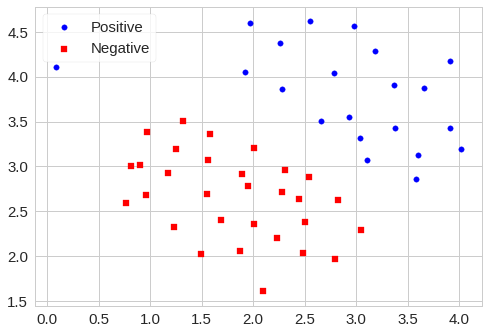

In [8]:
data = pd.read_csv('data/data1.csv', delimiter=' ', names=['x1', 'x2', 'y'])

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

plt.scatter(positive['x1'], positive['x2'], s=30, marker='o', c='b', label='Positive')
plt.scatter(negative['x1'], negative['x2'], s=30, marker='s', c='r', label='Negative')
plt.legend(loc='best', frameon=True)
plt.show()

Notice that there is one outlier positive example that sits apart from the others.
The classes are still linearly separable but it's a very tight fit.

* In this exercise you will see how outlier affects decision boundary of SVM.
* You will also try using different values of the C
  parameter with SVMs. Informally, the C parameter is a positive value that
  controls the penalty for misclassified training examples. A large C parameter
  tells the SVM to try to classify all the examples correctly.


#### 1. Build an SVM classifier using svm implementation from scikit-learn.
Try to use different values of parameter C (e.g., C=1, C=100)

R2: 0.9803921568627451


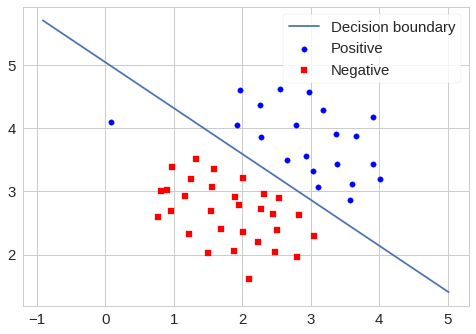

In [13]:
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)

svc.fit(data[['x1', 'x2']], data['y'])
print("R2: {}".format(svc.score(data[['x1', 'x2']], data['y'])))


def plot_hyperplane(model, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = model.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 1, max_x + 1)  # make sure the line is long enough
    yy = a * xx - (model.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)
    

plot_hyperplane(svc, np.min(data['x1']), np.max(data['x1']), '-', 'Decision boundary')
plt.scatter(positive['x1'], positive['x2'], s=30, marker='o', c='b', label='Positive')
plt.scatter(negative['x1'], negative['x2'], s=30, marker='s', c='r', label='Negative')
plt.legend(loc='best', frameon=True)
plt.show()

##  SVM with RBF Kernels

In this part of the exercise, you will be using SVMs to do non-linear classification.
In particular, you will use SVMs with RBF kernels on
datasets that are not linearly separable.

Load a dataset and visualize it.

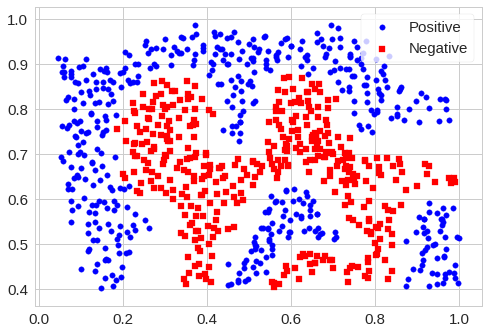

In [14]:
data = pd.read_csv('data/data2.csv', delimiter=' ', names=['x1', 'x2', 'y'])

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

plt.scatter(positive['x1'], positive['x2'], s=30, marker='o', c='b', label='Positive')
plt.scatter(negative['x1'], negative['x2'], s=30, marker='s', c='r', label='Negative')
plt.legend(loc='best', frameon=True)
plt.show()

From the figure, you can obserse that there is no linear decision boundary that
separates the positive and negative examples for this dataset. However, by
using the RBF kernel with the SVM, you will be able to learn a non-linear
decision boundary that can perform reasonably well for the dataset.

RBF kernel is defined as follows:
$$
K_{rbf}(x, y) = \exp\left ( -\frac{\|x - y\|^2}{2\sigma^2}\right ) = \exp(-\gamma \|x - y\|^2)
$$

#### 1. Implement RBF kernel

* Complete the function rbf_kernel() and try to build SVM model using your kernel.
* Try to change C and gamma parameters of RBF kernel and see how the decision boundary changes with these parameters.

In [15]:
from sklearn.metrics.pairwise import pairwise_distances

def rbf_kernel(x, y, gamma=1):
    # ======= Your code here ======
    distances = pairwise_distances(x, y)
    k = np.exp(-gamma * distances**2)
    return k

R2: 0.9895712630359212


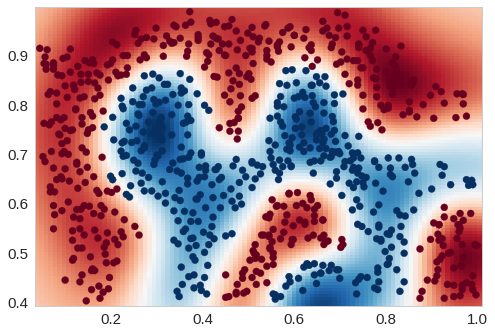

In [16]:
gamma = 50
kernel = lambda x, y: rbf_kernel(x, y, gamma=gamma)

svc = svm.SVC(C=1, kernel=kernel)
svc.fit(data[['x1', 'x2']], data['y'])
print("R2: {}".format(svc.score(data[['x1', 'x2']], data['y'])))


def plot_decision_function(model, lower_bound, upper_bound):
    # visualize parameter's effect on decision function
    xx, yy = np.meshgrid(np.linspace(lower_bound[0] - 0.01, upper_bound[0] + 0.01, 100),
                         np.linspace(lower_bound[1] - 0.01, upper_bound[1] + 0.01, 100))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(data['x1'], data['x2'], c=data['y'], cmap=plt.cm.RdBu_r)
    plt.axis('tight')
    plt.show()
    
plot_decision_function(svc, data[['x1', 'x2']].min(axis=0), data[['x1', 'x2']].max(axis=0))

### Choosing parameters

In this part of exercise you need to choose the best C and gamma parameters of the SVM.

This time except the training set you are given a validation set.

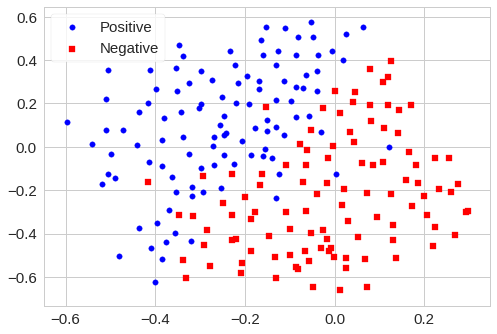

In [19]:
data_train = pd.read_csv('data/data3.csv', delimiter=' ', names=['x1', 'x2', 'y'])
data_val = pd.read_csv('data/data3_val.csv', delimiter=' ', names=['x1', 'x2', 'y'])

positive = data_train[data_train['y'].isin([1])]
negative = data_train[data_train['y'].isin([0])]

plt.scatter(positive['x1'], positive['x2'], s=30, marker='o', c='b', label='Positive')
plt.scatter(negative['x1'], negative['x2'], s=30, marker='s', c='r', label='Negative')
plt.legend(loc='best', frameon=True)
plt.show()

Your task is to use the cross validation to determine the
best C and gamma parameters.
You should write any additional code necessary
to help you search over the parameters C and gamma.
For both C and gamma, we suggest trying values in multiplicative steps
(e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30).
Note that you should try all possible pairs of values for C and gamma
(e.g., C = 0.3 and gamma = 0.1). For example, if you try each of the 8 values listed above for C
and for gamma, you would end up training and evaluating (on the cross validation
set) a total of 8 * 8 = 64 different models.

In [23]:
# ====== Your code here ======
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit

gamma_range = [0.01, 0.03, 0.1, 0.3, 1, 3, 10]
C_range = [0.01, 0.03, 0.1, 0.3, 1, 3, 10]
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
model = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
# model.fit(data[['x1', 'x2']], data['y'])

best_model = grid

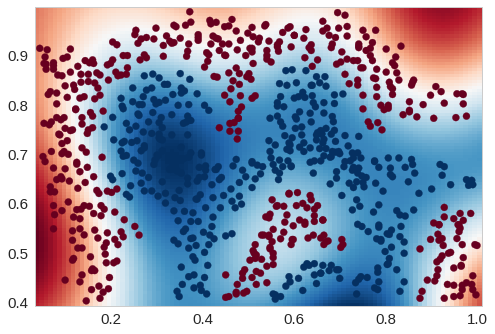

In [24]:
plot_decision_function(best_model, data[['x1', 'x2']].min(axis=0), data[['x1', 'x2']].max(axis=0))

### Spam classification

Many email services today provide spam filters that classify emails
into spam and non-spam with high accuracy. In this part of the exercise,
you use SVMs to build your own spam filter.
You train an SVM model to classify whether a given email, x, is
spam (y = 1) or non-spam (y = 0). In particular, you need to convert each
email into a feature vector $x \in \mathbb{R}^d$.
The following parts of the exercise will walk you through construction of such a feature vector from an email.

#### Preprocessing emails

Before starting on a machine learning task, it is usually insightful to
take a look at examples from the dataset.

Let's do this.

In [25]:
with open('data/emailSample1.txt', 'r') as email:
    email_text = email.read()
    
print(email_text)

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100.
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com



The sample email contains a URL, an email address (at the end), numbers, and dollar
amounts. While many emails contain similar types of entities (e.g.,
numbers, other URLs, or other email addresses), the specific entities (e.g.,
the specific URL or specific dollar amount) are different in almost every
email. Therefore, one method often employed in processing emails is to
“normalize” these values, so that all URLs are treated the same, all numbers
are treated the same, etc. For example, we could replace each URL in the
email with the unique string “httpaddr” to indicate that a URL was present.

This has the effect of letting the spam classifier make a classification decision
based on whether any URL was present, rather than whether a specific URL
was present. This typically improves the performance of a spam classifier,
since spammers often randomize the URLs, and thus the odds of seeing any
particular URL again in a new piece of spam is very small.

In [28]:
import re
from stemming.porter2 import stem


def process_email(email_text):

    # Load Vocabulary
    with open('data/vocab.txt', 'r') as vocabulary:
        vocabulary_list = vocabulary.read().split('\n')
        vocabulary_list = [word.split(' ')[-1] for word in vocabulary_list]

    # Init return value
    word_indices = []

    # ========================== Preprocess Email ===========================

    # Find the Headers ( \n\n and remove )
    # Uncomment the following lines if you are working with raw emails with the
    # full headers

    # hdrstart = strfind(email_contents, ([char(10) char(10)]));
    processed_email = email_text.strip()
    
    # Lower case
    processed_email = processed_email.lower()

    # Strip all HTML
    # Looks for any expression that starts with < and ends with > and replace
    # and does not have any < or > in the tag it with a space
    processed_email = re.sub('<([^<>]*)>', ' \g<1> ', processed_email)

    # Handle Numbers
    # Look for one or more characters between 0-9 and replace them by word "number"
    processed_email = re.sub('[0-9]+', 'number', processed_email)

    # Handle URLS
    # Look for strings starting with http:// or https:// and replace them by word "httpaddr"
    processed_email = re.sub('(http|https)://[^\s]*','httpaddr',  processed_email)

    # Handle Email Addresses
    # Look for strings with @ in the middle and replace them by word "emailaddr"
    processed_email = re.sub('[^\s]+@[^\s]+', 'emailaddr', processed_email)

    # Handle $ sign and replace by word "dollar"
    processed_email = re.sub('[$]+', 'dollar ', processed_email)


    # ========================== Tokenize Email ===========================

   
    # Tokenize and also get rid of any punctuation
    tokens_list = re.split('[ @$/#\.-:&*+=\[\]\?\!\(\)\{\},\'">_<;%\n]', processed_email)
    
    # remove empty tokens
    tokens_list = [tok for tok in tokens_list if tok]
    print(tokens_list)
    
    for token in tokens_list:
        # Remove any non alphanumeric characters
        token = re.sub('[^a-zA-Z0-9]', '', token)

        # Stem the word 
        token = stem(token)

        # Skip the word if it is too short
        if len(token) < 1:
            continue

        # Look up the word in the dictionary and add to word_indices if
        # found
        # ====================== YOUR CODE HERE ======================
        # Instructions: Fill in this function to add the index of token to
        #               word_indices if it is in the vocabulary. At this point
        #               of the code, you have a stemmed word from the email in
        #               the variable token. You should look up token in the
        #               vocabulary list (vocabulary_list). If a match exists, you
        #               should add the index of the word to the word_indices
        #               vector. Concretely, if token == 'action', then you should
        #               look up the vocabulary list to find where in vocabList
        #               'action' appears. For example, if vocabulary_list[18] ==
        #               'action', then, you should add 18 to the word_indices 
        #               vector (e.g., word_indices.append(18)).
        #


        for i in range(len(vocabulary_list)):
            if vocabulary_list[i] == token:
                word_indices.append(i)
                break
                
        # =============================================================

    return word_indices

processed_email = process_email(email_text)

['anyone', 'knows', 'how', 'much', 'it', 'costs', 'to', 'host', 'a', 'web', 'portal', 'well', 'it', 'depends', 'on', 'how', 'many', 'visitors', 'you', 're', 'expecting', 'this', 'can', 'be', 'anywhere', 'from', 'less', 'than', 'number', 'bucks', 'a', 'month', 'to', 'a', 'couple', 'of', 'dollar', 'number', 'you', 'should', 'checkout', 'httpaddr', 'or', 'perhaps', 'amazon', 'ecnumber', 'if', 'youre', 'running', 'something', 'big', 'to', 'unsubscribe', 'yourself', 'from', 'this', 'mailing', 'list', 'send', 'an', 'email', 'to', 'emailaddr']


In [ ]:
def get_features(word_indices, vocabulary_size=1899):
    """
    EMAILFEATURES takes in a word_indices vector and produces a feature vector
    
    from the word indices
       x = EMAILFEATURES(word_indices) takes in a word_indices vector and 
       produces a feature vector from the word indices. 
    """
    
    """ ====================== YOUR CODE HERE ======================
    Instructions: Fill in this function to return a feature vector for the
                  given email (word_indices). The variable
                  word_indices contains the list of indices of the words
                  which occur in one email.
    
                  Concretely, if an email has the text:
    
                     The quick brown fox jumped over the lazy dog.
    
                  Then, the word_indices vector for this text might look 
                  like:
                   
                      60  100   33   44   10     53  60  58   5
    
                  where, we have mapped each word onto a number, for example:
    
                      the   -- 60
                      quick -- 100
                      ...
    
                 Your task is to take one such word_indices vector and construct
                 a binary feature vector that indicates whether a particular
                 word occurs in the email. That is, x(i) = 1 when word i
                 is present in the email. Concretely, if the word 'the' (say,
                 index 60) appears in the email, then x(60) = 1. The feature
                 vector should look like:
    
                 x = [ 0 0 0 0 1 0 0 0 ... 0 0 0 0 1 ... 0 0 0 1 0 ..]
    """


    x = np.zeros(vocabulary_size)

    for index in word_indices:
        x[index] = 1

    return x

word_indices = process_email(email_text)
x = get_features(word_indices)
print(x)

#### Training SVM for Spam Classification

After creation of the feature extraction functions, the next step
is loading of a preprocessed training dataset that will be used to train
an SVM classifier.
spamTrain.csv contains 4000 training examples of spam
and non-spam email, while spamTest.csv contains 1000 test examples.
Each original email was processed using the process_email and get_features
functions and converted into a vector $x \in \mathbb{R}^{1899}$.

After loading the dataset, an SVM model will be trained to
classify between spam (y = 1) and non-spam (y = 0) emails.
Once the training completes, you should see that the classifier gets a training accuracy
of about 99.9% and a test accuracy of about 99.9%.

In [ ]:
data_train = np.loadtxt('data/spamTrain.csv')
data_test = np.loadtxt('data/spamTest.csv')

x = data_train[:, :-1]
y = data_train[:, -1:]

x_test = data_test[:, :-1]
y_test = data_test[:, -1:]

svc = svm.LinearSVC(C=0.1)
svc.fit(x, y)
print('Training accuracy = {0}%'.format(np.round(svc.score(x, y) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(svc.score(x_test, y_test) * 100, 2)))